# 00 Exploration

##### created: 11-2-2018
##### last mod:
##### modifications:
###### 11-2-2018: created notebook
***

### Goals:
1. Explore the (fake) student-level dataset `fake_data.dta`
2. 
3. 

In [2]:
import gzip
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [4]:
with gzip.open("../data/processed/fake_data.dta.gz", "rb") as dataset:
    df = pd.read_stata(dataset, )
    
print(f"Shape of file: {df.shape[0]:,.0f} rows, {df.shape[1]:.0f} columns.")
print("Dataframe stats:")
df.describe()
print("Dataframe head:")
df.head()

Shape of file: 10,000,000 rows, 16 columns.
Dataframe stats:


,ids,age,units,year
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.503703e+05,4.100960e+01,3.119873e+00,2.015000e+03
std,2.598108e+05,1.356697e+01,9.085057e-01,8.164495e-01
min,1.000000e+05,1.800000e+01,2.000000e+00,2.014000e+03
25%,3.255310e+05,2.900000e+01,2.000000e+00,2.014000e+03
50%,5.505160e+05,4.100000e+01,3.000000e+00,2.015000e+03
75%,7.755160e+05,5.300000e+01,4.000000e+00,2.016000e+03
max,9.999980e+05,6.400000e+01,5.000000e+00,2.016000e+03


Dataframe head:


,ids,sex,age,first_time_status,intent,race,full_time,college,top_code,subject,course_number,course_name,units,grades,year,quarter
0,471900,female,38,returning,AA,asian,full-time,Butte College,000322,ESL,20,Writing II,3,C,2015,Spring
1,506657,female,35,returning,transfer,asian,full-time,San Diego Mesa College,000104,ENG,35,Reading III,2,B-,2014,Winter
2,780835,female,58,returning,credential,latino,part-time,Sierra College,000102,MAT,103,Linear Algebra II,4,C+,2016,Spring
3,258697,female,59,returning,transfer,white,full-time,De Anza College,000104,ENG,96,Pre-pre-pre-pre-College Composition,2,C-,2014,Spring
4,677933,female,45,returning,transfer,latino,full-time,San Jose City College,004028,STA,77,Bio Statitics,3,B-,2015,Winter


***
Exploring by College:

In [5]:
sd_mesa = df[df['college'] == 'San Diego Mesa College'].copy()

In [6]:
sd_mesa['course_name'].value_counts()

Reading II                             6696
Reading IIII                           6650
Reading III                            6647
Reading I                              6610
Writing II                             3423
Calculus                               3415
Intro to Micro Economics               3408
Colonization: Europe                   3397
Speaking III                           3393
Health Economics                       3382
Eastern Civilizations                  3378
Developmental Economics                3353
World History I                        3350
Statitics                              3344
Micro Economics                        3343
Speaking II                            3338
Pre-Statitics                          3334
Reading V                              3329
Linear Algebra II                      3319
Macro Economics                        3317
Intro to Colonization                  3314
Pre-pre-Algebra                        3312
Trigonometry                    

In [7]:
# as a visualization
import altair as alt

In [20]:
data = sd_mesa[sd_mesa['year'] == 2015]['course_name'].value_counts().to_frame().reset_index()
data.columns = ['course_name', 'count']
data.head()

,course_name,count
0,Reading III,2278
1,Reading IIII,2228
2,Reading II,2217
3,Reading I,2201
4,Statitics,1186


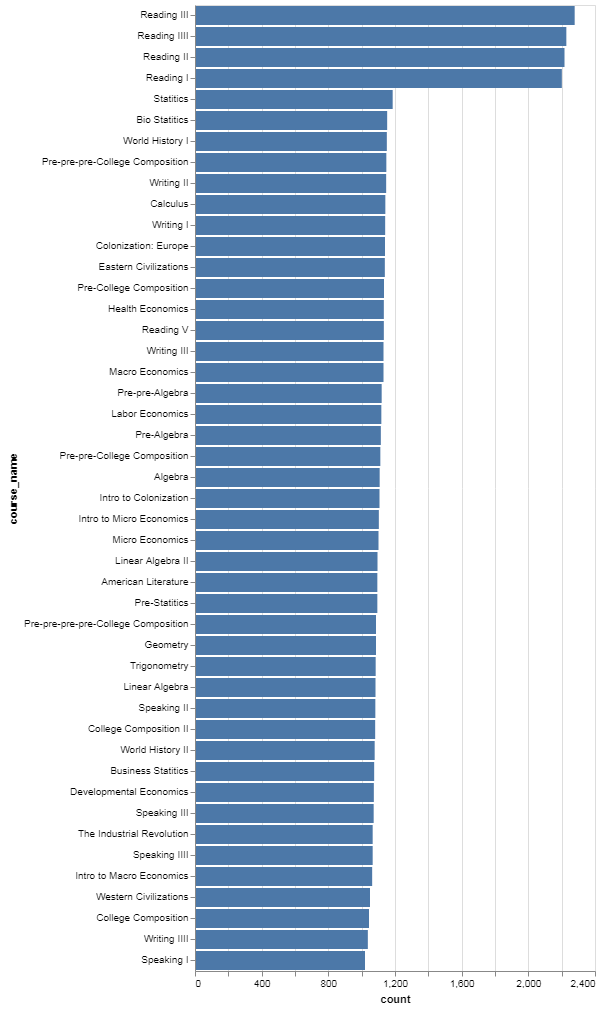

In [21]:
data.sort_values('count', ascending = False, inplace = True)

alt.Chart(data).mark_bar().encode(
    x = 'count:Q',
    y = alt.Y('course_name:N', scale = alt.Scale(domain = list(data['course_name'])))
)

### Equity

In [25]:
equity = sd_mesa.groupby(['year', 'race'])['course_name'].value_counts().to_frame()

In [27]:
equity.columns = ['count']

equity.reset_index(inplace = True)

equity.head()

,year,race,course_name,count
0,2014,asian,Reading II,357
1,2014,asian,Reading IIII,343
2,2014,asian,Reading I,326
3,2014,asian,Reading III,310
4,2014,asian,Algebra,195


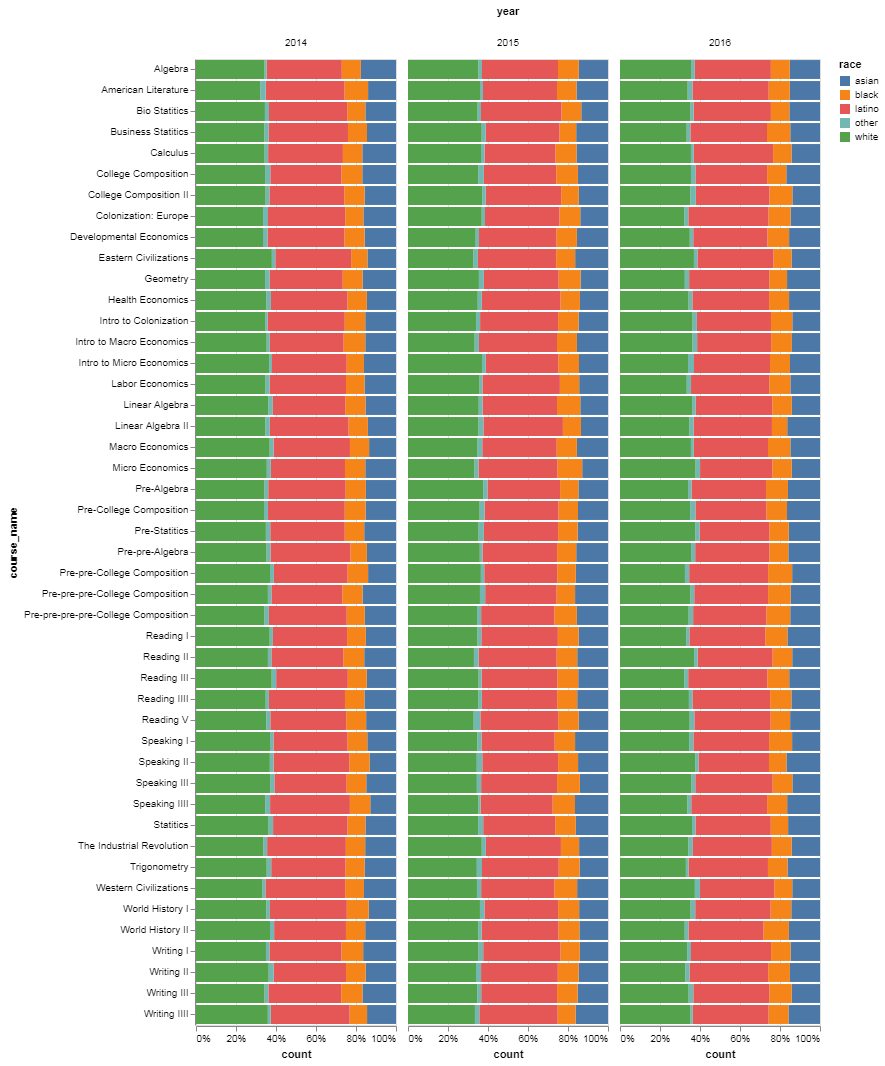

In [34]:
alt.Chart(equity).mark_bar().encode(
    x = alt.X("count:Q", stack = 'normalize', axis = alt.Axis(format = '%')),
    y = alt.Y("course_name:N"),
    color = alt.Color("race:N"),
    column = alt.Column("year")
).properties(
    width = 200,
)

#### diff between part-time and full-time students

In [37]:
pd.crosstab(sd_mesa['full_time'], sd_mesa['intent'], normalize = True, margins = True)

intent,AA,credential,transfer,All
full_time,,,,
full-time,0.063152,0.063925,0.192803,0.31988
part-time,0.135571,0.135813,0.408736,0.68012
All,0.199738,0.601539,0.198723,1.00000


In [52]:
dff = sd_mesa.groupby(['year', 'race', 'full_time', 'intent'])['units'].sum().to_frame().reset_index()
dff['share'] = dff.groupby(['year', 'race', 'full_time'])['units'].apply(lambda x: x/x.sum())

dff

,year,race,full_time,intent,units,share
0,2014,asian,full-time,AA,1729.0,0.203460
1,2014,asian,full-time,credential,1656.0,0.194869
2,2014,asian,full-time,transfer,5113.0,0.601671
3,2014,asian,part-time,AA,3556.0,0.197205
4,2014,asian,part-time,credential,3628.0,0.201198
5,2014,asian,part-time,transfer,10848.0,0.601597
6,2014,black,full-time,AA,1069.0,0.190961
7,2014,black,full-time,credential,1055.0,0.188460
8,2014,black,full-time,transfer,3474.0,0.620579
9,2014,black,part-time,AA,2279.0,0.202632


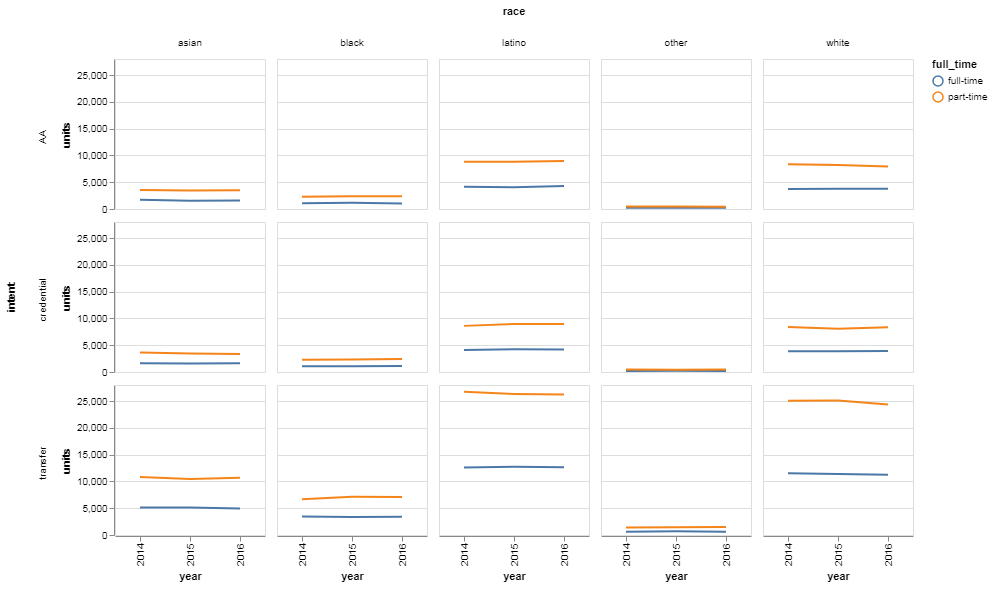

In [64]:
chart = alt.Chart(dff).mark_line().encode(
    x = 'year:O',
    y = 'units:Q',
    color = 'full_time:N',
    column = 'race:N',
    row = 'intent:N'
).properties(
    width = 150,
    height = 150,
)

chart